# Ford GoBike Data exploration
## by Dina Adel Shalabi

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. In this report we will try to 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
bikes = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
bikes.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
bikes.shape

(183412, 16)

In [6]:
bikes['member_age'] = 2021 - bikes['member_birth_year']

I will be dropping rows that contain NaN,  and changing the types of some columns from float to int and change the start and end times to dataframes datetime type.

In [7]:
Bikes = bikes.copy()
Bikes = Bikes.dropna()

In [8]:
Bikes = Bikes.astype({"member_birth_year":'int', "start_station_id":'int', "end_station_id":'int', "member_birth_year":'int', "member_age":'int',}) 

In [9]:
Bikes['start_time'] = pd.to_datetime(Bikes['start_time'])
Bikes['end_time'] = pd.to_datetime(Bikes['end_time'])

In [10]:
Bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int32         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  int32         
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [11]:
Bikes.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,37
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,49
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,32
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,47
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,62


### What is the structure of your dataset?

> Our data contains 174952 records for 16 columns (17 after I added member_age column).

### What is/are the main feature(s) of interest in your dataset?

> When are most trips taken in terms of time of day, day of the week, or month of the year, by customers or subscribers?<br>
How long does the average trip take?<br>
Does the above depend on if a user is a subscriber or customer?<br>
Bikers ages and gender analysis for sales point of views..

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> **The features that we will use during our investigation:**<br>
duration_sec<br>
station_start_position<br>
station_end_position<br>
user_type<br>
member_gender<br>
member_age<br>


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

***Members Gender***

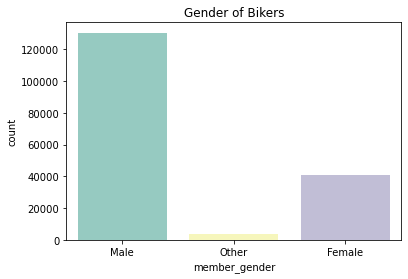

In [12]:
sb.countplot(data= Bikes, x = "member_gender",  palette="Set3");
plt.title('Gender of Bikers');

So as we see, the major number of members are males, followed by females and others

***User Types***

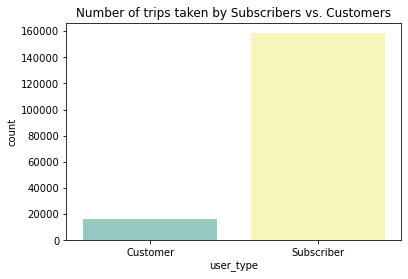

In [13]:
sb.countplot(data= Bikes, x = "user_type",  palette="Set3");
plt.title('Number of trips taken by Subscribers vs. Customers');

So, as we see, the number of subcribers are eight times more the number of customers

***User Ages***

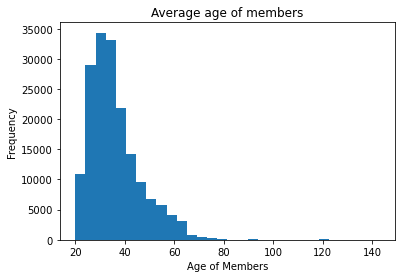

In [14]:
Bikes['member_age'].plot(kind = 'hist' , bins = 30).set(xlabel = 'Age of Members')
plt.title('Average age of members');
plt.show()

As we see the age of our users are left-skewed but the max number of users are of age 40.

### Now let's inspect the trip's start and end times

Let's add a month column to see what months have the highest trips.

In [15]:
Bikes['month'] = pd.DatetimeIndex(Bikes['start_time']).month

In [16]:
print(Bikes['start_time'].dt.month.value_counts())
print(Bikes['end_time'].dt.month.value_counts())

2    174952
Name: start_time, dtype: int64
2    174938
3        14
Name: end_time, dtype: int64


As we can see almost all the rides are in February, but we've got some outliers that wwe can handle.<br>
Those 14 records in end time in March 2019 must be dropped so we could focus on the records in February.

In [17]:
Bikes = Bikes[Bikes['end_time'].dt.month == 2]

In [18]:
Bikes.shape

(174938, 18)

We should start looking at the peak days where bikes are used...

In [19]:
Bikes['day'] = pd.DatetimeIndex(Bikes['start_time']).day

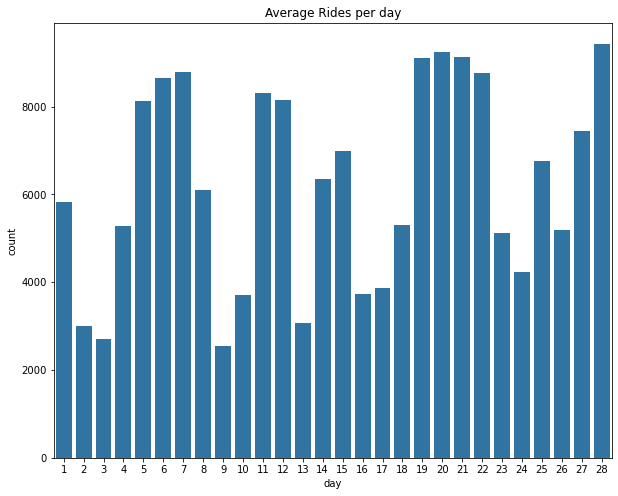

In [20]:
plt.figure(figsize=(10,8))
sb.countplot(data=Bikes,x='day', color=sb.color_palette()[0])
plt.title('Average Rides per day');

So as we can see the peak days are the 19th, 20th, 21st, 22nd.

Now let's have a look at the duration/minute

In [21]:
Bikes['duration_min'] = Bikes['duration_sec'] / 60

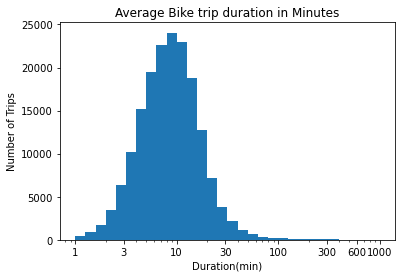

In [22]:
bins = 10 ** np.arange(0 , 3+0.1 , 0.1)
ticks =  [ 1 , 3, 10, 30, 100, 300, 600, 1000]

labels = ['{}'.format(v) for v in ticks]

plt.hist(data = Bikes , x = 'duration_min' , bins = bins);

#Changing to log scale so we could see our plot properly
plt.xscale('log');
plt.xticks(ticks, labels);

plt.xlabel('Duration(min)');
plt.title('Average Bike trip duration in Minutes');
plt.ylabel('Number of Trips');


As seen from our plot, the average trip duration is 10 minutes 

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> First, the data was recorded in the month of February. We saw that there are some records that have end time in March but we removed them.<br>
We also did some algorthimic transformations to help improve skewed plots.<br>



## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### ***The Relationship between User type and Duration of trip in minutes***

In [23]:
Bikes['duration_sec_log'] = np.log(Bikes['duration_sec'])

Text(0.5, 0, 'User Type')

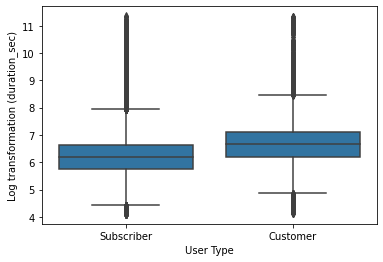

In [56]:
base_color = sb.color_palette()[0]
#plt.figure(figsize=(10,5))
sb.boxplot(data=Bikes, x='user_type', y='duration_sec_log', color=base_color)
plt.ylabel('Log transformation (duration_sec)');
plt.xlabel('User Type')

Here we've done some log transformation on the duration in seconds, so we could see the relationship between both variables.<br><br>
**As we can see that mean duration per second of a customer's trip is greater than that of a subscriber...interesting!<br>**

### *Let's investigate the relationship between the a Member's age and the Duration of his trip in seconds*

Text(0, 0.5, 'Trip Duration (min)')

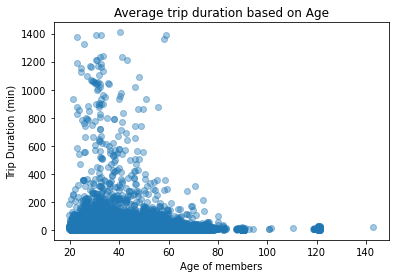

In [53]:
sb.regplot(data = Bikes, x = 'member_age', y = 'duration_min', x_jitter=0.5,  y_jitter=0.5, fit_reg=False,scatter_kws={'alpha': 0.4 });
#plt.reg(data = Bikes, x = 'member_birth_year', y = 'duration_min');
plt.title('Average trip duration based on Age');
plt.xlabel('Age of members')
plt.ylabel('Trip Duration (min)')

Members between ages 25 and 40 will most likely take longer trips.

### *Now let's see the relationship between the Member's Gender and the duration of his/her trip*

Text(0, 0.5, 'Trip Duration (sec)')

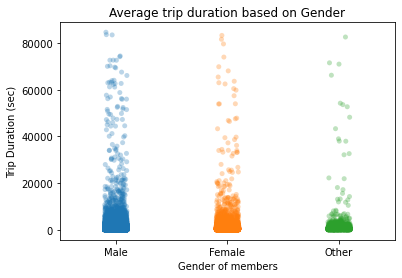

In [52]:
sb.stripplot(data = Bikes, x = 'member_gender', y = 'duration_sec',  alpha=0.3);
plt.title('Average trip duration based on Gender');
plt.xlabel('Gender of members')
plt.ylabel('Trip Duration (sec)')

Seems that males can stay longer on trips!!

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> *First of all, customers will stay longer than subscribers (on average) on their bike trips.<br>*
*Second, Members between ages 25 and 40 will most likely take longer trips.<br>*
*Third, Males tend to stay longer on their trips!<br>*


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### *Let's investigate the relation between the members gender, their types and the duration of their trips*

Text(0.5, 0, 'User Type')

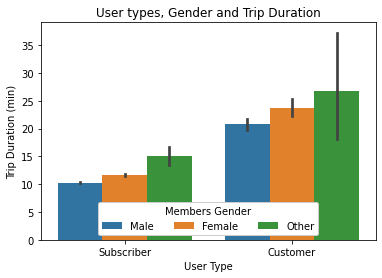

In [55]:
ax = sb.barplot(data = Bikes, x = 'user_type', y = 'duration_min', hue = 'member_gender')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Members Gender')
plt.title('User types, Gender and Trip Duration');
plt.ylabel('Trip Duration (min)')
plt.xlabel('User Type')

As we see from our graph that customers(all genders) tend to have longer trips than subscribers.

### Were there any interesting or surprising interactions between features?

> The fact that the number of customers is greater than the number of subscribers in differnet aspects is very interesting and would make an excellent case study for the sales team!!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!